In [1]:
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
food = pd.read_csv('../data/37WIC_Monthly-5.csv', skiprows = [0,1])
food = food.reset_index(drop=True)
food.head()

,Fiscal,PROGRAM PARTICIPATION,Unnamed: 2,Unnamed: 3,Unnamed: 4,Food,NSA*,Average,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Year,Women,Infants,Children,Total,Costs,Costs,Food Cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANNUAL SUMMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FY 2021,"1,379,161","1,464,732","3,400,098","6,243,990","2,647,989,412","2,017,533,294",35.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FY 2020,"1,446,146","1,551,034","3,250,234","6,247,414","2,884,448,549","1,984,059,680",38.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FY 2019,"1,514,882","1,609,703","3,271,855","6,396,441","3,139,343,101","1,986,427,541",40.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fiscal                 61 non-null     object 
 1   PROGRAM PARTICIPATION  53 non-null     object 
 2   Unnamed: 2             53 non-null     object 
 3   Unnamed: 3             53 non-null     object 
 4   Unnamed: 4             53 non-null     object 
 5   Food                   53 non-null     object 
 6   NSA*                   53 non-null     object 
 7   Average                53 non-null     object 
 8   Unnamed: 8             0 non-null      float64
 9   Unnamed: 9             0 non-null      float64
 10  Unnamed: 10            0 non-null      float64
 11  Unnamed: 11            0 non-null      float64
 12  Unnamed: 12            0 non-null      float64
 13  Unnamed: 13            0 non-null      float64
 14  Unnamed: 14            0 non-null      float64
 15  Unname

In [5]:
food.columns

Index(['Fiscal', 'PROGRAM PARTICIPATION', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Food', 'NSA*', 'Average', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

In [6]:
food_subset = food[['Fiscal', 'PROGRAM PARTICIPATION', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Food', 'NSA*', 'Average']]
food_subset.head(20)

,Fiscal,PROGRAM PARTICIPATION,Unnamed: 2,Unnamed: 3,Unnamed: 4,Food,NSA*,Average
0,Year,Women,Infants,Children,Total,Costs,Costs,Food Cost
1,ANNUAL SUMMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FY 2021,"1,379,161","1,464,732","3,400,098","6,243,990","2,647,989,412","2,017,533,294",35.34
3,FY 2020,"1,446,146","1,551,034","3,250,234","6,247,414","2,884,448,549","1,984,059,680",38.48
4,FY 2019,"1,514,882","1,609,703","3,271,855","6,396,441","3,139,343,101","1,986,427,541",40.90
5,FY 2018,"1,633,864","1,712,401","3,523,863","6,870,128","3,374,688,123","1,976,341,659",40.93
6,MONTHLY DATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,FY 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Oct 2018,"1,585,013","1,670,647","3,433,818","6,689,478","249,111,450","621,616,739",37.24
9,Nov 2018,"1,547,015","1,643,717","3,356,771","6,547,503","270,975,382","92,071,643",41.39


In [7]:
inflation = pd.read_csv('../data/inflation_data.csv')
inflation = inflation.reset_index(drop=True)
inflation.head()

,year,amount,inflation rate
0,2012,1.00,0.02
1,2013,1.01,0.01
2,2014,1.03,0.02
3,2015,1.03,0.00
4,2016,1.05,0.01


In [8]:
eat = pd.read_csv('../data/37WIC_Monthly-5-2.csv', header = None, skiprows = [0, 1], usecols=range(6))
eat = eat.reset_index(drop=True)
eat.head()

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,Percent Change,NaN
1,State /,February,January,February,February 2017 vs:,NaN
2,Territory,2016,2017,2017,Jan. 17,Feb. 16
3,NaN,NaN,Preliminary,Initial,NaN,NaN
4,Alabama,"128,220","126,063","122,917",-2.5%,-4.1%


In [9]:
eat.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109
0,NaN,State /,Territory,NaN,Alabama,Alaska,American Samoa,Arizona,Dept. of Health,Navajo Nation,Inter-Tribal Council,Arkansas,California,Colorado,Dept. of Health,Ute Mountain Ute Tribe,Connecticut,Delaware,District of Columbia,Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Dept. of Human Services,Pleasant Point,Indian Township,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,State Board of Health,Choctaw Indians,Missouri,Montana,Nebraska,Dept. of Health,Omaha Sioux,Winnebago Tribe,Santee Sioux,Nevada,Division of Health,Inter-Tribal Council,New Hampshire,New Jersey,New Mexico,Dept. of Health,Eight Northern Pueblos,Isleta Pueblo,Zuni Pueblo,Five Sandoval Pueblos,Santo Domingo Tribe,San Felipe Pueblo,"Acoma, Canoncito & Laguna",New York,Dept. of Health,Seneca Nation,North Carolina,Dept. of Health,Eastern Cherokee,North Dakota,Dept. of Health,Standing Rock Sioux Tribe,Three Affiliated Tribes,Ohio,Oklahoma,Dept. of Health,Choctaw Nation,Chickasaw Nation,Muscogee Creek Nation,Cherokee Nation,Citizen Potawatomi Nation,Osage Tribal Council,Otoe-Missouria Tribe,Inter-Tribal Council,"Wichita, Caddo & Delaware (WCD)",Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Dept. of Health,Cheyenne River Sioux,Rosebud Sioux,Tennessee,Texas,Utah,Vermont,Virginia,Virgin Islands,Washington,West Virginia,Wisconsin,Wyoming,Dept. of Health,Northern Arapahoe,Shoshone Tribe,Northern Marianas,TOTAL,WIC is the common abbreviation for Special Sup...,Data are subject to revision.
1,NaN,February,2016,NaN,"128,220","18,913","6,042","161,429","143,616","8,758","9,055","79,899","1,174,784","86,522","86,320",202,"48,351","18,210","14,081","477,177","252,786","7,151","30,343","39,132","224,064","147,464","60,665","59,238","110,861","128,301","20,909","20,795",51,63,"138,914","113,624","232,684","114,954","83,811","83,126",685,"128,161","18,478","38,169","37,589",225,227,128,"70,306","68,939","1,367","14,059","154,253","51,997","48,816",236,"1,192",661,273,170,291,358,"457,308","457,118",190,"239,439","238,871",568,"12,881","12,056",624,201,"233,203","109,240","82,506","4,016","3,702","2,834","6,848","1,249","2,792",474,809,"4,010","90,464","236,352","159,202","19,853","107,528","19,049","17,059",773,"1,217","141,243","858,671","56,664","12,876","130,096","4,268","168,323","40,055","99,349","10,792","10,201",433,158,"3,203","7,664,011",NaN,NaN
2,NaN,January,2017,Preliminary,"126,063","18,446","5,716","150,688","133,855","7,868","8,965","76,349","1,113,961","83,691","83,539",152,"47,993","16,751","14,029","472,252","242,428","6,660","28,249","36,948","214,629","144,272","62,367","55,541","108,079","121,010","19,563","19,444",64,55,"135,884","113,603","225,646","111,265","82,810","82,118",692,"120,810","17,732","37,852","37,271",229,238,114,"67,728","66,340","1,388","13,335","150,512","50,533","47,264",227,"1,302",631,238,182,288,401,"442,837","442,674",163,"232,374","231,750",624,"12,672","11,839",548,285,"223,983","107,271","80,669","3,831","3,730","2,629","7,102","1,371","2,928",410,754,"3,847","88,814","225,841","142,461","19,849","101,139","18,395","16,369",730,"1,296","137,395","830,654","54,627","11,599","124,428","3,832","161,233","38,193","96,534","10,379","9,768",424,187,"3,248","7,381,153",NaN,NaN
3,NaN,February,2017,Initial,"122,917","18,070","5,696","146,085","129,862","7,650","8,573","75,739","1,074,629","83,354","83,169",185,"46,865","16,524","13,586","436,692","238,233","6,639","26,858","36,675","210,192","141,586","62,104","53,618","107,839","120,324","19,022","18,908",59,55,"133,762","111,481","222,903","109,750","81,364","80,723",641,"119,849","17,337","3

In [10]:
eat.info

<bound method DataFrame.info of                                                      0          1  \
0                                                  NaN        NaN   
1                                  State /               February   
2                                  Territory                 2016   
3                                                  NaN        NaN   
4                                              Alabama    128,220   
..                                                 ...        ...   
105                                     Shoshone Tribe        158   
106                                  Northern Marianas      3,203   
107                                              TOTAL  7,664,011   
108  WIC is the common abbreviation for Special Sup...        NaN   
109                      Data are subject to revision.        NaN   

               2          3                  4        5  
0            NaN        NaN     Percent Change      NaN  
1        January   Febr

In [11]:
avgfc = pd.read_csv('../data/37WIC-avgfoodcost.csv', skiprows = [0,1])
avgfc = avgfc.reset_index(drop=True)
avgfc.head()

,State / Indian Tribe,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,49.87,46.59,45.19,48.34,45.52
2,Alaska,53.74,50.48,54.64,52.61,52.94
3,American Samoa,70.18,69.41,70.52,72.94,74.51
4,Arizona,42.16,42.88,44.09,45.55,44.93


In [12]:
avgfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State / Indian Tribe           108 non-null    object 
 1   FY 2012                        105 non-null    float64
 2   FY 2013                        105 non-null    float64
 3   FY 2014                        105 non-null    float64
 4   FY 2015                        105 non-null    float64
 5   FY 2016                        105 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.2+ KB


In [13]:
foodcost = pd.read_csv('../data/37WIC-foodcost.csv', skiprows = [0,1])
foodcost = foodcost.reset_index(drop=True)
foodcost.head()

,State / Indian Tribe,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,"84,923,273","77,704,135","71,057,962","76,644,919","70,551,498"
2,Alaska,"16,102,872","13,965,769","12,855,268","12,424,923","12,146,098"
3,American Samoa,"5,590,429","5,455,915","5,452,108","5,417,577","5,358,853"
4,Arizona,"97,758,696","93,916,999","91,537,137","91,321,845","88,424,748"


In [14]:
foodcost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State / Indian Tribe           108 non-null    object
 1   FY 2012                        105 non-null    object
 2   FY 2013                        105 non-null    object
 3   FY 2014                        105 non-null    object
 4   FY 2015                        105 non-null    object
 5   FY 2016                        105 non-null    object
dtypes: object(6)
memory usage: 5.2+ KB


In [15]:
foodcost.head(15)

,State / Indian Tribe,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,"84,923,273","77,704,135","71,057,962","76,644,919","70,551,498"
2,Alaska,"16,102,872","13,965,769","12,855,268","12,424,923","12,146,098"
3,American Samoa,"5,590,429","5,455,915","5,452,108","5,417,577","5,358,853"
4,Arizona,"97,758,696","93,916,999","91,537,137","91,321,845","88,424,748"
5,Dept. of Health,"86,653,177","83,378,296","81,750,196","81,665,666","79,126,301"
6,Navajo Nation,"6,228,055","5,919,388","5,537,402","5,330,689","4,952,393"
7,Inter-Tribal Council,"4,877,464","4,619,315","4,249,539","4,325,490","4,346,054"
8,Arkansas,"51,813,703","50,110,638","43,880,066","44,275,758","41,656,928"
9,California,"872,015,268","791,184,631","764,175,030","725,680,926","649,745,167"


In [16]:
Totalfc = pd.concat([foodcost, avgfc])
Totalfc.head(20)

,State / Indian Tribe,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,"84,923,273","77,704,135","71,057,962","76,644,919","70,551,498"
2,Alaska,"16,102,872","13,965,769","12,855,268","12,424,923","12,146,098"
3,American Samoa,"5,590,429","5,455,915","5,452,108","5,417,577","5,358,853"
4,Arizona,"97,758,696","93,916,999","91,537,137","91,321,845","88,424,748"
5,Dept. of Health,"86,653,177","83,378,296","81,750,196","81,665,666","79,126,301"
6,Navajo Nation,"6,228,055","5,919,388","5,537,402","5,330,689","4,952,393"
7,Inter-Tribal Council,"4,877,464","4,619,315","4,249,539","4,325,490","4,346,054"
8,Arkansas,"51,813,703","50,110,638","43,880,066","44,275,758","41,656,928"
9,California,"872,015,268","791,184,631","764,175,030","725,680,926","649,745,167"


In [17]:
Totalfc.isna().sum()

State / Indian Tribe             2
FY 2012                          8
FY 2013                          8
FY 2014                          8
FY 2015                          8
FY 2016                          8
dtype: int64

In [18]:
Totalfc.describe()

,State / Indian Tribe,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016
count,216,210,210.00,210.00,210.00,210.00
unique,98,205,206.00,206.00,206.00,206.00
top,Dept. of Health,"204,439,305",44.35,44.27,38.23,44.93
freq,20,2,2.00,2.00,2.00,2.00


In [19]:
Totalfc.info

<bound method DataFrame.info of                          State / Indian Tribe              FY 2012  \
0                                                  NaN         NaN   
1                                              Alabama  84,923,273   
2                                               Alaska  16,102,872   
3                                       American Samoa   5,590,429   
4                                              Arizona  97,758,696   
..                                                 ...         ...   
104                                     Shoshone Tribe       63.01   
105                                  Northern Marianas       69.35   
106                                              TOTAL        45.0   
107  WIC is the common abbreviation for Special Sup...         NaN   
108                      Data are subject to revision.         NaN   

        FY 2013     FY 2014     FY 2015     FY 2016  
0           NaN         NaN         NaN         NaN  
1    77,704,135  71

In [20]:
FoodInflation = pd.concat([eat, inflation])
FoodInflation.head(20)

,0,1,2,3,4,5,amount,inflation rate,year
0,NaN,NaN,NaN,NaN,Percent Change,NaN,NaN,NaN,NaN
1,State /,February,January,February,February 2017 vs:,NaN,NaN,NaN,NaN
2,Territory,2016,2017,2017,Jan. 17,Feb. 16,NaN,NaN,NaN
3,NaN,NaN,Preliminary,Initial,NaN,NaN,NaN,NaN,NaN
4,Alabama,"128,220","126,063","122,917",-2.5%,-4.1%,NaN,NaN,NaN
5,Alaska,"18,913","18,446","18,070",-2.0%,-4.5%,NaN,NaN,NaN
6,American Samoa,"6,042","5,716","5,696",-0.3%,-5.7%,NaN,NaN,NaN
7,Arizona,"161,429","150,688","146,085",-3.1%,-9.5%,NaN,NaN,NaN
8,Dept. of Health,"143,616","133,855","129,862",-3.0%,-9.6%,NaN,NaN,NaN
9,Navajo Nation,"8,758","7,868","7,650",-2.8%,-12.7%,NaN,NaN,NaN


In [26]:
FoodInflation.index = pd.DatetimeIndex(FoodInflation.index)
pivoted = FoodInflation.unstack().reset_index()

array([[<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'inflation rate'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

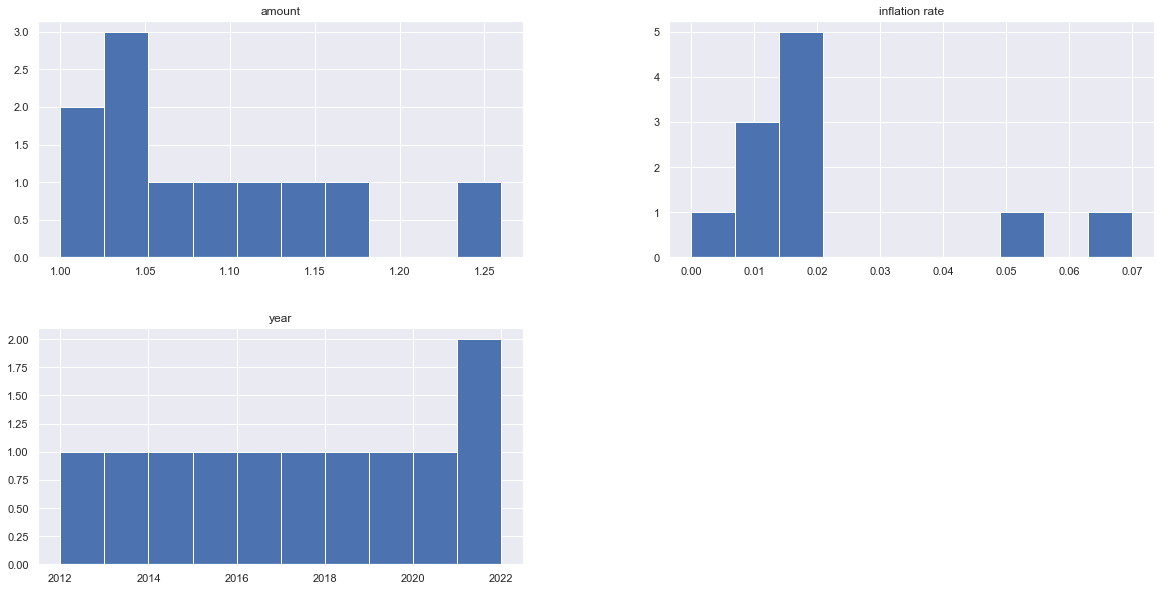

In [29]:
FoodInflation.hist(bins=10, figsize=[20, 10])

<AxesSubplot:>

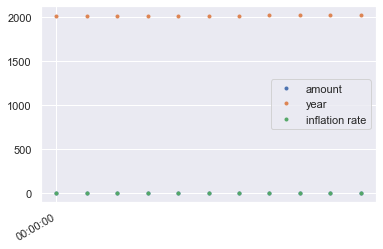

In [30]:
FoodInflation[['amount', 'year', 'inflation rate']].plot(style=".")

In [31]:
FoodInflation.isna().sum()

0                  13
1                  15
2                  14
3                  14
4                  14
5                  16
amount            110
inflation rate    110
year              110
dtype: int64

In [32]:
FoodInflation.describe()

,amount,inflation rate,year
count,11.000000,11.000000,11.000000
mean,1.087273,0.022727,2017.000000
std,0.079132,0.020045,3.316625
min,1.000000,0.000000,2012.000000
25%,1.030000,0.010000,2014.500000
50%,1.070000,0.020000,2017.000000
75%,1.120000,0.020000,2019.500000
max,1.260000,0.070000,2022.000000


In [ ]:
FoodInflation.columns

FoodInflation_subset = FoodInflation(['Unnamed:0', 'Percent Change', 'year', 'amount', 'inflation rate'])
FoodInflation_subset